all needed libraries for linear and logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lir
from sklearn.linear_model import LogisticRegression as lor
from sklearn.model_selection import train_test_split as sp

import data

In [2]:
data = pd.read_excel("data/grades.xlsx")
data.head()

,Stunden,Punkte,Bestande
0,2,49,WHACK
1,7,38,WHACK
2,0,7,WHACK
3,12,129,Durchschnitt
4,1,4,WHACK


convert string to numeric values for logistic regression

In [3]:
data["Bestande"] = data["Bestande"].map({"WHACK":0,"Durchschnitt":1})
data.head()

,Stunden,Punkte,Bestande
0,2,49,0
1,7,38,0
2,0,7,0
3,12,129,1
4,1,4,0


split train and test data and define columns for model training

In [4]:
# test_size is ratio between split, could be other value than 30%
train, test = sp(data, test_size = .3)

x = data["Stunden"].values.reshape(-1, 1)
y = data["Bestande"].values

x_train = train["Stunden"].values.reshape(-1, 1)
y_train = train["Bestande"].values

x_test = test["Stunden"].values.reshape(-1, 1)
y_test = test["Bestande"].values

plot data for quick overview

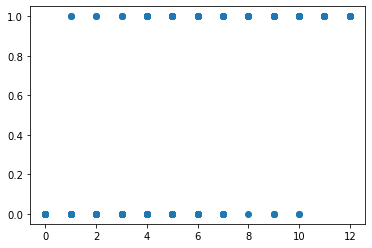

In [5]:
plt.scatter(x, y)

training logistic model with training data

In [6]:
model = lor().fit(x_train, y_train)

define random values and predicting their probability

In [7]:
x_predict = np.linspace(0, 12, 20).reshape(-1, 1)
y_predict = model.predict_proba(x_predict)[:,1]

plot data and logistic regression

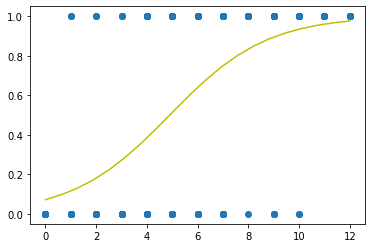

In [8]:
plt.scatter(x, y)
plt.plot(x_predict, y_predict, color = "y")
plt.show()

calculate score for model, values are between 0 and 1 (the higher, the better)

In [9]:
print("Score:", model.score(x_test, y_test))

Score: 0.8125


split train and test data and define columns for model training

In [10]:
x = data["Stunden"].values.reshape(-1, 1)
y = data["Punkte"].values.reshape(-1, 1)

plot data for quick overview

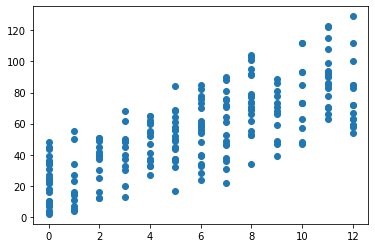

In [11]:
plt.scatter(x, y)
plt.show()

train linear model

In [12]:
model = lir().fit(x, y)
coef = model.coef_[0]
intercept = model.intercept_

plot model

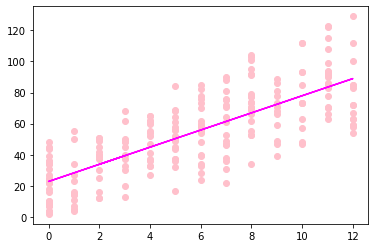

In [13]:
plt.scatter(x, y, color = "pink")
plt.plot(x, coef * x + intercept, color = "fuchsia")
plt.show()

check residues (error despendent?)

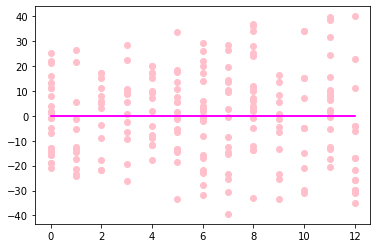

In [14]:
plt.scatter(x, y - (coef * x + intercept), color = "pink")
plt.plot(x, 0 * x, color = "fuchsia")
plt.show()

plot residues as histogram (expected value = 0 and normal distribution)

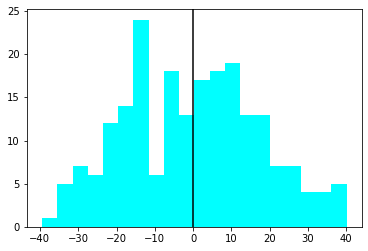

In [15]:
plt.hist(y - (coef * x + intercept), bins = 20, color = "cyan")
plt.axvline(np.mean(y - (coef * x + intercept)), color = "black")
plt.show()

calculate r2 value

In [16]:
print("R2:", model.score(x,y))

R2: 0.5835324959871742
